In [1]:
# https://www.yutaka-note.com/entry/matplotlib_inline
%matplotlib inline

In [2]:
import collections
import csv
import datetime
import os
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pycircos
from collections import Counter
from IPython.display import display
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

In [3]:
# define the UP or DOWN regulated genes
direction = "UP"

# define the input file
HUMAN_CHROMOSOME = "../data/chromosome/chromosome_human.tsv"
RICE_CHROMOSOME  = "../data/chromosome/chromosome_rice.tsv"
# combined data
HUMAN_ANNOTATION = "../data/human_annotation/human_annotation_up.tsv"
RICE_ANNOTATION  = "../data/rice_annotation/rice_annotation_up.tsv"
# GOslim
HUMAN_GOSLIM = "../data/biomart_goslim/biomart_human_goslim_R110.tsv" # release 110
RICE_GOSLIM = "../data/biomart_goslim/biomart_rice_goslim_R56.tsv" # release 56


now = datetime.datetime.now()
directory = f'../data/circos_result_{direction}_{now.strftime("%y%m")}'
os.makedirs(directory, exist_ok=True)

# define the output file
COMBINED_CHROMOSOME = f"../data/{directory}/HR_combined.tsv"
COMBINED_SCORE = f"../data/{directory}/HR_combined_score_{direction}.tsv"
HUMAN_NO_ANNOTATION = f"../data/{directory}/human_goslim_noannotation_{direction}.tsv"
HUMAN_EXTRACT_GOSLIM_GENE = f"../data/{directory}/human_goslim_{direction}.tsv"
RICE_NO_ANNOTATION = f"../data/{directory}/rice_goslim_noannotation_{direction}.tsv"
RICE_EXTRACT_GOSLIM_GENE = f"../data/{directory}/rice_goslim_{direction}.tsv"
COMBINED_GOSLIM = f"../data/{directory}/merged_goslim_{direction}.tsv"
COMBINED_GOSLIM_SORTED = f"../data/{directory}/merged_goslim_sorted_{direction}.tsv"

In [4]:
#organism = "human"
df = pd.read_csv(HUMAN_CHROMOSOME, sep='\t')
df_subset = df[['chr', 'start', 'end']].copy()
df_subset['chr'] = 'H_' + df_subset['chr'].astype(str)
df_subset['organism'] = 'human'# assign the tag


# organism = "rice"
df1 = pd.read_csv(RICE_CHROMOSOME, sep='\t')
df1_subset = df1[['chr', 'start', 'end']].copy()
df1_subset['chr'] = 'R_' + df1_subset['chr'].astype(str)    
df1_subset['organism'] = 'rice'# assign the tag

combined_df = pd.concat([df_subset, df1_subset])
combined_df.reset_index(drop=True, inplace=True)
combined_df.to_csv(COMBINED_CHROMOSOME, sep='\t', index=False)

display(combined_df)

,chr,start,end,organism
0,H_1,1,248956422,human
1,H_2,1,242193529,human
2,H_3,1,198295559,human
3,H_4,1,190214555,human
4,H_5,1,181538259,human
5,H_6,1,170805979,human
6,H_7,1,159345973,human
7,H_8,1,145138636,human
8,H_9,1,138394717,human
9,H_10,1,133797422,human


In [5]:
# Initialize
circle = Gcircle(figsize=(12,12))

# Set Chromosome Data
n = 935
m = 985

# Read the combined DataFrame
for index, row in combined_df.iterrows():
    name = row['chr']
    length = row['end']
    organism = row['organism']
    
    # get the chromosome number
    chrom_number_str = name.split('_')[1] # "H_1" -> "1"
    
    try:
        chrom_number = int(chrom_number_str)
        if organism == 'human':
            color = plt.cm.Blues(chrom_number / 24)  # change the color dynamically based on 22+X+Y
        else:
            color = plt.cm.Greens(chrom_number / 14)  # change the color dynamically based on 12+X+Y
    except ValueError:  # if chrom_number is not a number
        if chrom_number_str == "X":
            color = plt.cm.Blues(23 / 24)
        elif chrom_number_str == "Y":
            color = plt.cm.Blues(24 / 24)
        elif chrom_number_str == "Mt":
            color = plt.cm.Greens(13 / 14)
        elif chrom_number_str == "Pt":
            color = plt.cm.Greens(14 / 14)
        else:
            color = 'grey'
    
    arc = Garc(arc_id=name, 
               size=length, 
               interspace=0.5, 
               raxis_range=(n, m), 
               labelposition=int(30 + (m-n)/2),
               labelsize=7,
               label_visible=True,
               facecolor=color)
    circle.add_garc(arc)

<Figure size 1200x1200 with 0 Axes>

In [6]:
circle.set_garcs(0,360)

In [7]:
for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, 
                    raxis_range=(985,1000), 
                    tickinterval=20000000, 
                    ticklabels=None) 

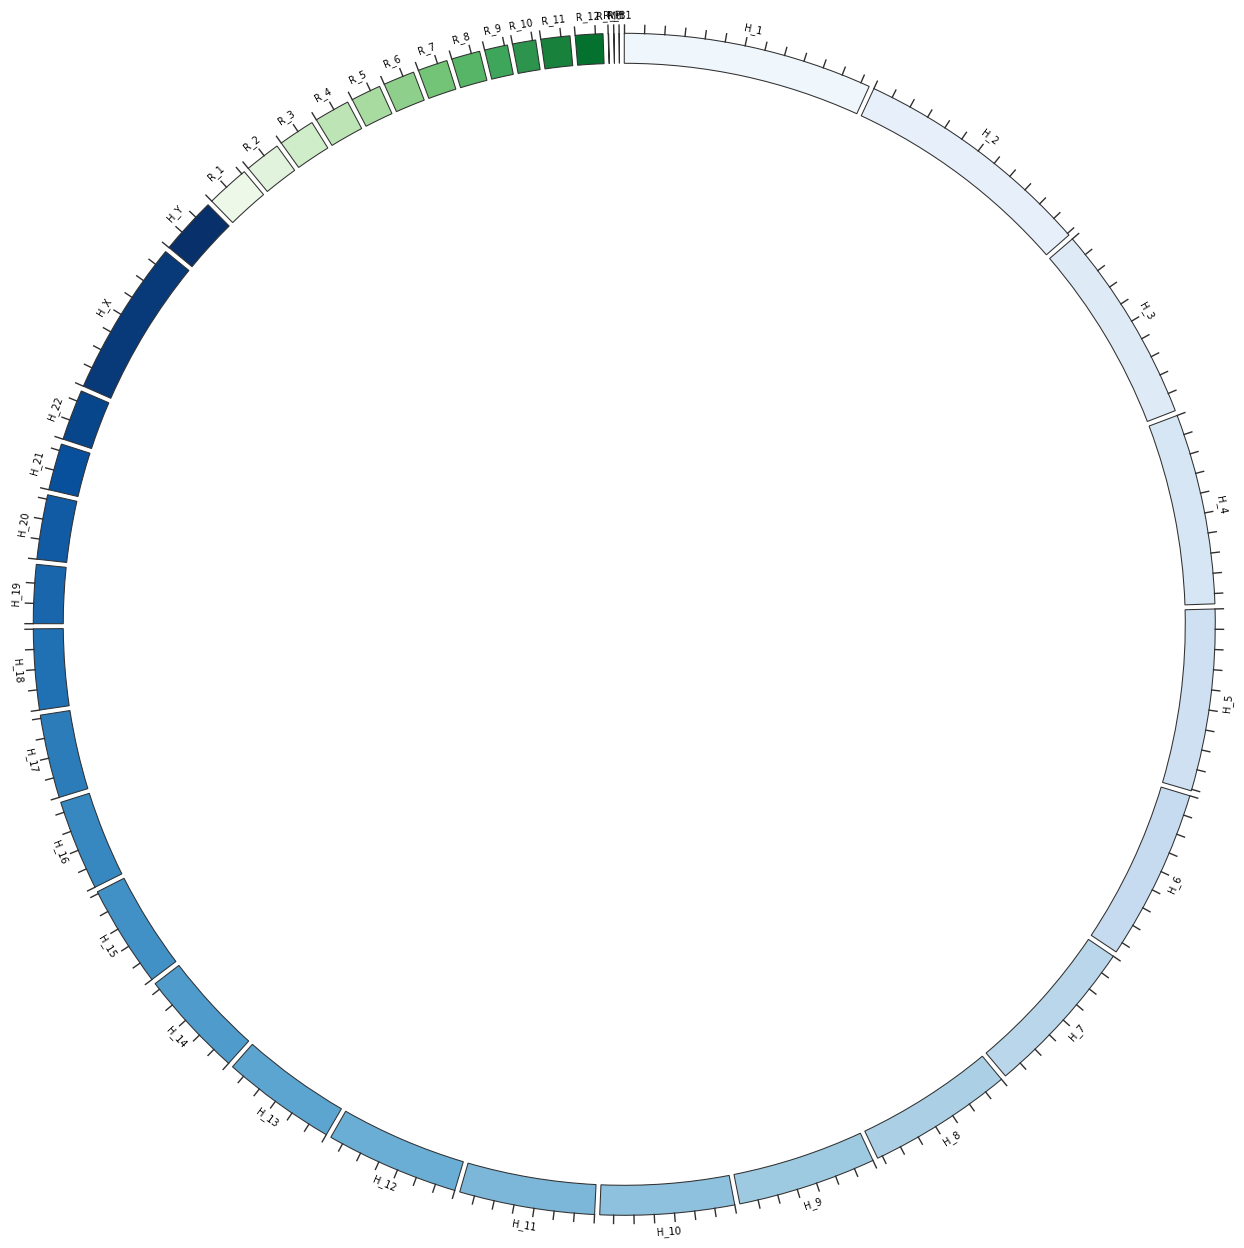

In [8]:
circle.figure

#### Scatter plot of human vs rice upregulated genes

In [32]:
#organism = "human"
df_h_score = pd.read_csv(HUMAN_ANNOTATION, sep='\t')
df_h_score['Chromosome/scaffold name'] = 'H_' + df_h_score['Chromosome/scaffold name'].astype(str)
df_h_score['organism'] = 'human'# assign the tag


# organism = "rice"
df_r_score = pd.read_csv(RICE_ANNOTATION, sep='\t')
df_r_score['Chromosome/scaffold name'] = 'R_' + df_r_score['Chromosome/scaffold name'].astype(str)
df_r_score['organism'] = 'rice'# assign the tag


# combined human and rice DataFrame
combined_df_score = pd.concat([df_h_score, df_r_score])
combined_df_score.reset_index(drop=True, inplace=True)
combined_df_score.to_csv(COMBINED_SCORE, sep='\t', index=False)
display(combined_df_score)
display(df_h_score)

KeyError: "['columns=Unnamed: 0'] not found in axis"

In [27]:
# Initialize
arcdata_dict = collections.defaultdict(dict)

for index, row in combined_df_score.iterrows():
    name = row['Chromosome/scaffold name']
    start = row['Gene start(bp)']
    end = row['Gene end(bp)']
    mid = (start + end) // 2
    value = row['HN-score(HN5)']

    if name not in arcdata_dict: # if the key is not in the dictionary, add it
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["values"] = []

    arcdata_dict[name]["positions"].append(mid)
    arcdata_dict[name]["values"].append(value)


# plot
vmin, vmax = combined_df_score['HN-score(HN5)'].min(), combined_df_score['HN-score(HN5)'].max()
for key in arcdata_dict:
    circle.scatterplot(
        key,
        data=arcdata_dict[key]["values"],
        positions=arcdata_dict[key]["positions"], 
        rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
        raxis_range=(840, 940),
        facecolor="orangered",
        edgecolor="black",
        spine=True
    )

KeyError: 'H_nan'

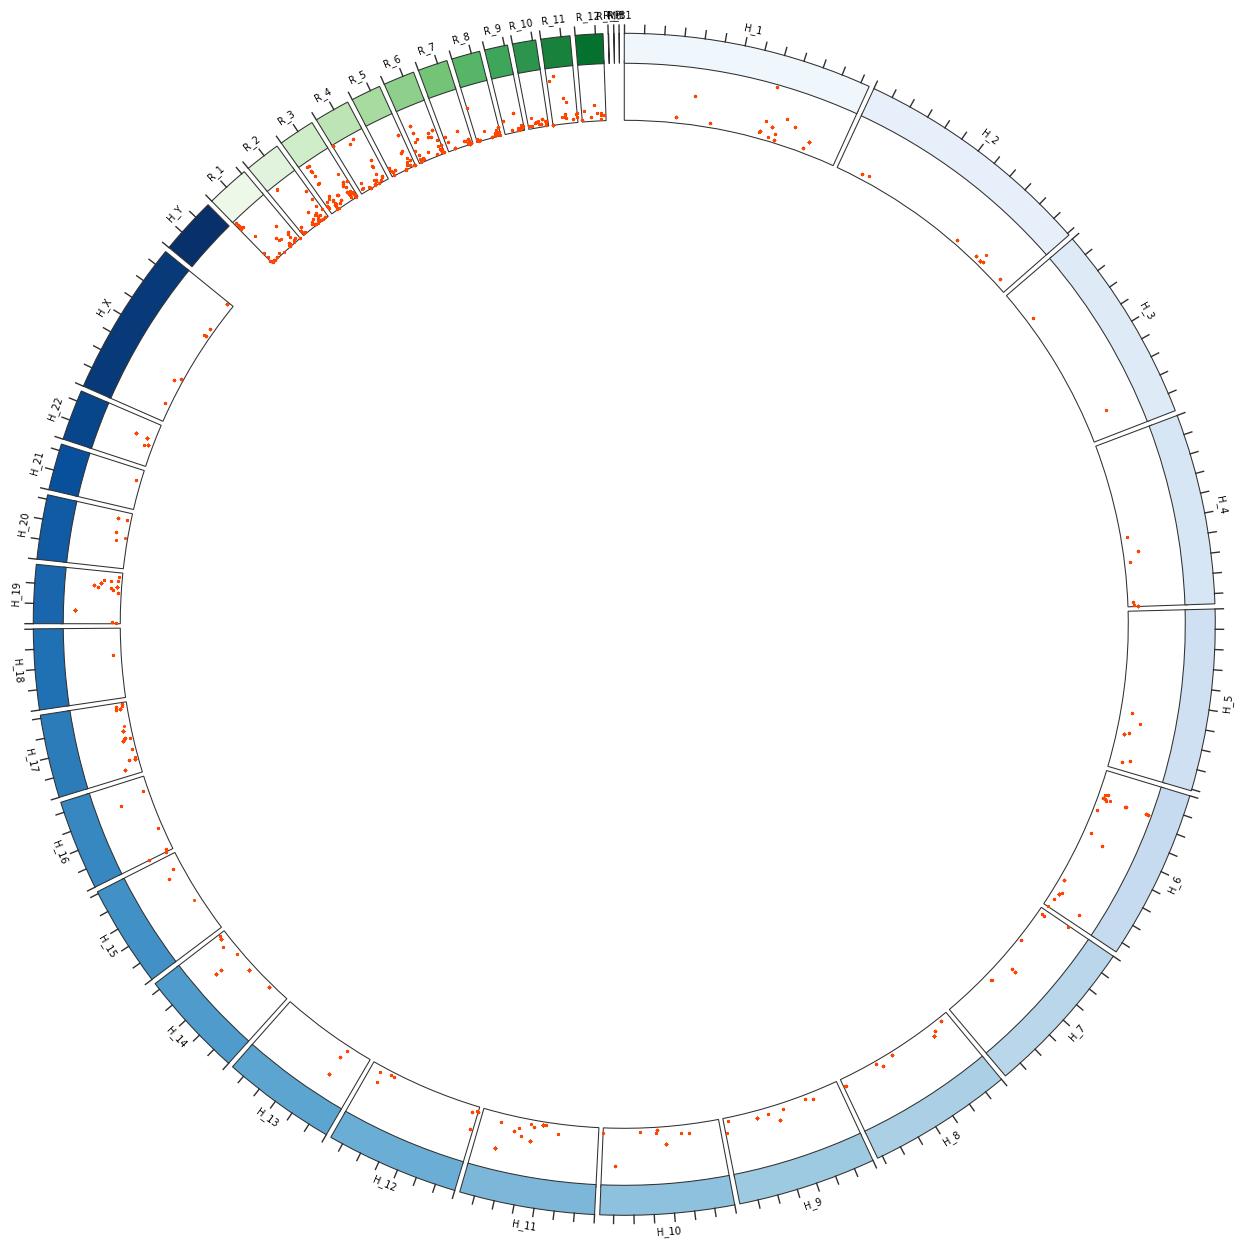

In [11]:
circle.figure

#### linkplot of GOslim terms for human vs rice upregulated genes

##### human

In [23]:
# Prepare the extract up genes data from GOslim file

# organism = "human"
# Using df_h_score_subset for extract up genes data from GOslim file
df_h_goslim = pd.read_csv(HUMAN_GOSLIM, sep='\t')
df_h_goslim['Chromosome/scaffold name'] = 'H_' + df_h_goslim['Chromosome/scaffold name'].astype(str)


extract_df_h_goslim = pd.merge(
    df_h_score, df_h_goslim,
    left_on=['Gene stable ID', 'Chromosome/scaffold name'],
    right_on=['Gene stable ID', 'Chromosome/scaffold name'],
    how='inner'
)

# Extract genes with no annotations
extract_df_h_goslim_with_indicator = pd.merge(
    df_h_score, df_h_goslim,
    left_on=['Gene stable ID', 'Chromosome/scaffold name'],
    right_on=['Gene stable ID', 'Chromosome/scaffold name'],
    how='left',
    indicator=True # add indicator column to show the difference
)

# extract_df_h_goslim_with_indicator
left_only_rows = extract_df_h_goslim_with_indicator[extract_df_h_goslim_with_indicator['_merge'] == 'left_only']

# left_only_rows
left_only_rows.to_csv(HUMAN_NO_ANNOTATION, sep='\t', index=False)
extract_df_h_goslim.to_csv(HUMAN_EXTRACT_GOSLIM_GENE, sep='\t', index=False)
display(extract_df_h_goslim)

/tmp/ipykernel_16900/1812243417.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_h_goslim = pd.read_csv(HUMAN_GOSLIM, sep='\t')


,Unnamed: 0,Gene stable ID,Chromosome/scaffold name,Gene start(bp),Gene end(bp),GOSlim GOA Accession(s)_x,GOSlim GOA Description_x,converted_alias,HN-score(HN5),name,organism,start2 (bp),end2 (bp),GOSlim GOA Accession(s)_y,GOSlim GOA Description_y
0,0,ENSG00000173110,H_1,161524540.0,161526894.0,GO:0140657,ATP-dependent activity,ENSG00000173110,245,HSPA6,human,161524540,161526894,GO:0140657,ATP-dependent activity
1,0,ENSG00000173110,H_1,161524540.0,161526894.0,GO:0140657,ATP-dependent activity,ENSG00000173110,245,HSPA6,human,161524540,161526894,GO:0044183,protein folding chaperone
2,0,ENSG00000173110,H_1,161524540.0,161526894.0,GO:0140657,ATP-dependent activity,ENSG00000173110,245,HSPA6,human,161524540,161526894,GO:0043226,organelle
3,0,ENSG00000173110,H_1,161524540.0,161526894.0,GO:0140657,ATP-dependent activity,ENSG00000173110,245,HSPA6,human,161524540,161526894,GO:0005856,cytoskeleton
4,0,ENSG00000173110,H_1,161524540.0,161526894.0,GO:0140657,ATP-dependent activity,ENSG00000173110,245,HSPA6,human,161524540,161526894,GO:0005815,microtubule organizing center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409393,4868,ENSG00000174226,H_8,100572889.0,100663415.0,GO:0008289,lipid binding,ENSG00000174226,51,SNX31,human,100572889,100663415,GO:0008289,lipid binding
409394,4868,ENSG00000174226,H_8,100572889.0,100663415.0,GO:0008289,lipid binding,ENSG00000174226,51,SNX31,human,100572889,100663415,GO:0006886,intracellular protein transport
409395,4868,ENSG00000174226,H_8,100572889.0,100663415.0,GO:0008289,lipid binding,ENSG00000174226,51,SNX31,human,100572889,100663415,GO:0008289,lipid binding
409396,4868,ENSG00000174226,H_8,100572889.0,100663415.0,GO:0008289,lipid binding,ENSG00000174226,51,SNX31,human,100572889,100663415,GO:0006886,intracellular protein transport


##### rice

In [13]:
# organism = "rice"
# Using df_r_score_subset for extract up genes data from GOslim file

df_r_goslim = pd.read_csv(RICE_GOSLIM, sep='\t')
df_r_goslim['Chromosome/scaffold name'] = 'R_' + df_r_goslim['Chromosome/scaffold name'].astype(str)

extract_df_r_goslim = pd.merge(
    df_r_score_subset, df_r_goslim,
    left_on=['Gene stable ID', 'Chromosome/scaffold name'],
    right_on=['Gene stable ID', 'Chromosome/scaffold name'],
    how='inner'
)

# Extract genes with no annotations
extract_df_r_goslim_with_indicator = pd.merge(
    df_r_score_subset, df_r_goslim,
    left_on=['Gene stable ID', 'Chromosome/scaffold name'],
    right_on=['Gene stable ID', 'Chromosome/scaffold name'],
    how='left',
    indicator=True # add indicator column to show the difference
)

# extract_df_r_goslim_with_indicator
left_only_rows = extract_df_r_goslim_with_indicator[extract_df_r_goslim_with_indicator['_merge'] == 'left_only']

# left_only_rows
left_only_rows.to_csv(RICE_NO_ANNOTATION, sep='\t', index=False)
extract_df_r_goslim.to_csv(RICE_EXTRACT_GOSLIM_GENE, sep='\t', index=False)
display(extract_df_r_goslim)

/tmp/ipykernel_16900/1829781293.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_r_goslim = pd.read_csv(RICE_GOSLIM, sep='\t')


,Gene stable ID,Chromosome/scaffold name,Gene start(bp),Gene end(bp),HN-score(HN5),organism,start1 (bp),end1 (bp),GOSlim GOA Accession(s),GOSlim GOA Description
0,Os01g0105800,R_1,306871,308842,53,rice,306871,308842,GO:0008150,biological_process
1,Os01g0105800,R_1,306871,308842,53,rice,306871,308842,GO:0008152,metabolic process
2,Os01g0105800,R_1,306871,308842,53,rice,306871,308842,GO:0019538,protein metabolic process
3,Os01g0105800,R_1,306871,308842,53,rice,306871,308842,GO:0009987,cellular process
4,Os01g0105800,R_1,306871,308842,53,rice,306871,308842,GO:0016043,cellular component organization
...,...,...,...,...,...,...,...,...,...,...
50434,Os12g0600100,R_12,25242398,25246733,61,rice,25242398,25246733,GO:0003674,molecular_function
50435,Os12g0600100,R_12,25242398,25246733,61,rice,25242398,25246733,GO:0005515,protein binding
50436,Os12g0600100,R_12,25242398,25246733,61,rice,25242398,25246733,GO:0005488,binding
50437,Os12g0600100,R_12,25242398,25246733,61,rice,25242398,25246733,GO:0005575,cellular_component


##### __Merge human and rice GOslim terms__

In [14]:
# merge dataframe based on common column 'GOSlim GOA Accession(s)'
merged_df_goslim = pd.merge(
    extract_df_r_goslim, 
    extract_df_h_goslim,
    left_on=['GOSlim GOA Accession(s)'],
    right_on=['GOSlim GOA Accession(s)'],
    how='inner',
    suffixes=('_rice', '_human')
)

# extract necessary columns

merged_df_goslim = merged_df_goslim[['GOSlim GOA Accession(s)',
                                     'GOSlim GOA Description_rice',
                                     'GOSlim GOA Description_human',
                                     'Gene stable ID_rice',
                                     'Gene stable ID_human',
                                     'Chromosome/scaffold name_rice',
                                     'start1 (bp)',
                                     'end1 (bp)',
                                     'Chromosome/scaffold name_human',
                                     'start2 (bp)',
                                     'end2 (bp)',
                                     'HN-score(HN5)_rice',
                                     'HN-score(HN5)_human']]

# Remove duplicate rows based on specific columns
merged_df_goslim.drop_duplicates(inplace=True)

# for debugging purpose
unique_accessions_r = set(extract_df_r_goslim['GOSlim GOA Accession(s)'].unique())
unique_accessions_h = set(extract_df_h_goslim['GOSlim GOA Accession(s)'].unique())
common_accessions = unique_accessions_r.intersection(unique_accessions_h)
unique_accessions_merged = set(merged_df_goslim['GOSlim GOA Accession(s)'].unique())
missing_accessions = common_accessions.difference(unique_accessions_merged)
print(f"Number of common accessions: {len(common_accessions)}")
print(f"Number of missing accessions: {len(missing_accessions)}")
print(f"Missing accessions: {missing_accessions}")

merged_df_goslim.to_csv(COMBINED_GOSLIM, sep='\t', index=False)
display(merged_df_goslim)

Number of common accessions: 29
Number of missing accessions: 0
Missing accessions: set()


,GOSlim GOA Accession(s),GOSlim GOA Description_rice,GOSlim GOA Description_human,Gene stable ID_rice,Gene stable ID_human,Chromosome/scaffold name_rice,start1 (bp),end1 (bp),Chromosome/scaffold name_human,start2 (bp),end2 (bp),HN-score(HN5)_rice,HN-score(HN5)_human
0,GO:0005198,structural molecule activity,structural molecule activity,Os01g0105800,ENSG00000187475,R_1,306871,308842,H_6,26107412,26108135,53,72
10,GO:0005198,structural molecule activity,structural molecule activity,Os01g0105800,ENSG00000112110,R_1,306871,308842,H_6,159789812,159798436,53,63
19,GO:0005198,structural molecule activity,structural molecule activity,Os01g0105800,ENSG00000109846,R_1,306871,308842,H_11,111908564,111923722,53,173
2164,GO:0005198,structural molecule activity,structural molecule activity,Os01g0105800,ENSG00000170276,R_1,306871,308842,H_11,111912734,111914093,53,73
2170,GO:0005198,structural molecule activity,structural molecule activity,Os01g0105800,ENSG00000213937,R_1,306871,308842,H_16,3012923,3014505,53,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70233038,GO:0005730,nucleolus,nucleolus,Os06g0592500,ENSG00000132002,R_6,23293383,23294073,H_19,14514769,14560391,118,210
70236254,GO:0005730,nucleolus,nucleolus,Os06g0592500,ENSG00000160570,R_6,23293383,23294073,H_19,42198598,42220140,118,143
70236444,GO:0005730,nucleolus,nucleolus,Os06g0592500,ENSG00000184205,R_6,23293383,23294073,H_X,53082367,53088540,118,51
70236460,GO:0005730,nucleolus,nucleolus,Os06g0592500,ENSG00000186416,R_6,23293383,23294073,H_X,119588337,119606443,118,57


In [15]:
#Count the occurrences of each 'GOSlim GOA Accession(s)'
accession_counter = Counter(merged_df_goslim['GOSlim GOA Accession(s)'])

#Sort the DataFrame based on the counts
merged_df_goslim['count'] = merged_df_goslim['GOSlim GOA Accession(s)'].map(accession_counter)
merged_df_goslim_sorted = merged_df_goslim.sort_values('count', ascending=False).drop('count', axis=1)

merged_df_goslim_sorted.to_csv(COMBINED_GOSLIM_SORTED, sep='\t', index=False)
display(merged_df_goslim_sorted)


,GOSlim GOA Accession(s),GOSlim GOA Description_rice,GOSlim GOA Description_human,Gene stable ID_rice,Gene stable ID_human,Chromosome/scaffold name_rice,start1 (bp),end1 (bp),Chromosome/scaffold name_human,start2 (bp),end2 (bp),HN-score(HN5)_rice,HN-score(HN5)_human
11427202,GO:0003824,catalytic activity,catalytic activity,Os06g0159900,ENSG00000206172,R_6,3051248,3055005,H_16,176680,177522,70,69
11777762,GO:0003824,catalytic activity,catalytic activity,Os06g0229066,ENSG00000235863,R_6,6702956,6704431,H_6,33277123,33284832,155,75
11778200,GO:0003824,catalytic activity,catalytic activity,Os06g0229066,ENSG00000099139,R_6,6702956,6704431,H_9,75890644,76362975,155,98
11778150,GO:0003824,catalytic activity,catalytic activity,Os06g0229066,ENSG00000164949,R_6,6702956,6704431,H_8,94249253,94262350,155,69
11778081,GO:0003824,catalytic activity,catalytic activity,Os06g0229066,ENSG00000184647,R_6,6702956,6704431,H_8,10525532,10554166,155,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,GO:0005198,structural molecule activity,structural molecule activity,Os01g0105800,ENSG00000109846,R_1,306871,308842,H_11,111908564,111923722,53,173
70232013,GO:0005777,peroxisome,peroxisome,Os07g0529000,ENSG00000165507,R_7,20691213,20693521,H_10,44970981,44978809,59,70
70231961,GO:0005777,peroxisome,peroxisome,Os06g0253100,ENSG00000165507,R_6,7940956,7941680,H_10,44970981,44978809,129,70
69454437,GO:0045182,translation regulator activity,translation regulator activity,Os05g0373900,ENSG00000183655,R_5,18016742,18020353,H_15,85759326,85794925,42,74


In [16]:
# Add color data to 'GOSlim GOA Description' column
unique_ontologies = merged_df_goslim_sorted['GOSlim GOA Description_rice'].unique()

n = len(unique_ontologies)
colors = cm.rainbow(np.linspace(0, 1, n)) # create n colors by cm.rainbow

# create ontology_color_dict
ontology_color_dict = {term: color for term, color in zip(unique_ontologies, colors)}

# add to garc_dict
for term, color in ontology_color_dict.items():
    circle._garc_dict[term] = {'facecolor': color, 'edgecolor': color}

In [17]:
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)

# Count the number of ontology terms
ontology_count = Counter()
with open(COMBINED_GOSLIM_SORTED, mode='r', newline='') as f:
    reader = csv.DictReader(f, delimiter='\t')
    for row in reader:
        ontology = row['GOSlim GOA Description_rice']
        ontology_count[ontology] += 1

min_linewidth = 1 * 10**-40
max_linewidth = 0.002

min_count = min(ontology_count.values())
max_count = max(ontology_count.values())


with open(COMBINED_GOSLIM_SORTED, mode='r', newline='') as f:
    reader = csv.DictReader(f, delimiter='\t')
    for row in reader:
        name1 = row['Chromosome/scaffold name_rice'] # rice
        start1 = int(row['start1 (bp)'])
        end1 = int(row['end1 (bp)'])
        name2 = row['Chromosome/scaffold name_human'] # human
        start2 = int(row['start2 (bp)'])
        end2 = int(row['end2 (bp)'])
        ontology = row['GOSlim GOA Description_rice']

        # For debugging
        #print("Debugging Info:")
        #print(f"ontology: {ontology}")
        #print(f"circle._garc_dict[ontology]: {circle._garc_dict.get(ontology, 'Not found')}")

        count = ontology_count[ontology]
        linewidth = min_linewidth + (max_linewidth - min_linewidth) * ((count - min_count) / (max_count - min_count))
        
        source = (name1, start1, end1, 840)
        destination = (name2, start2, end2, 840)
        circle.chord_plot(source, 
                          destination, 
                          facecolor=circle._garc_dict[ontology]['facecolor'],
                          linewidth=linewidth,
                          edgecolor=circle._garc_dict[ontology]['edgecolor']
                          )

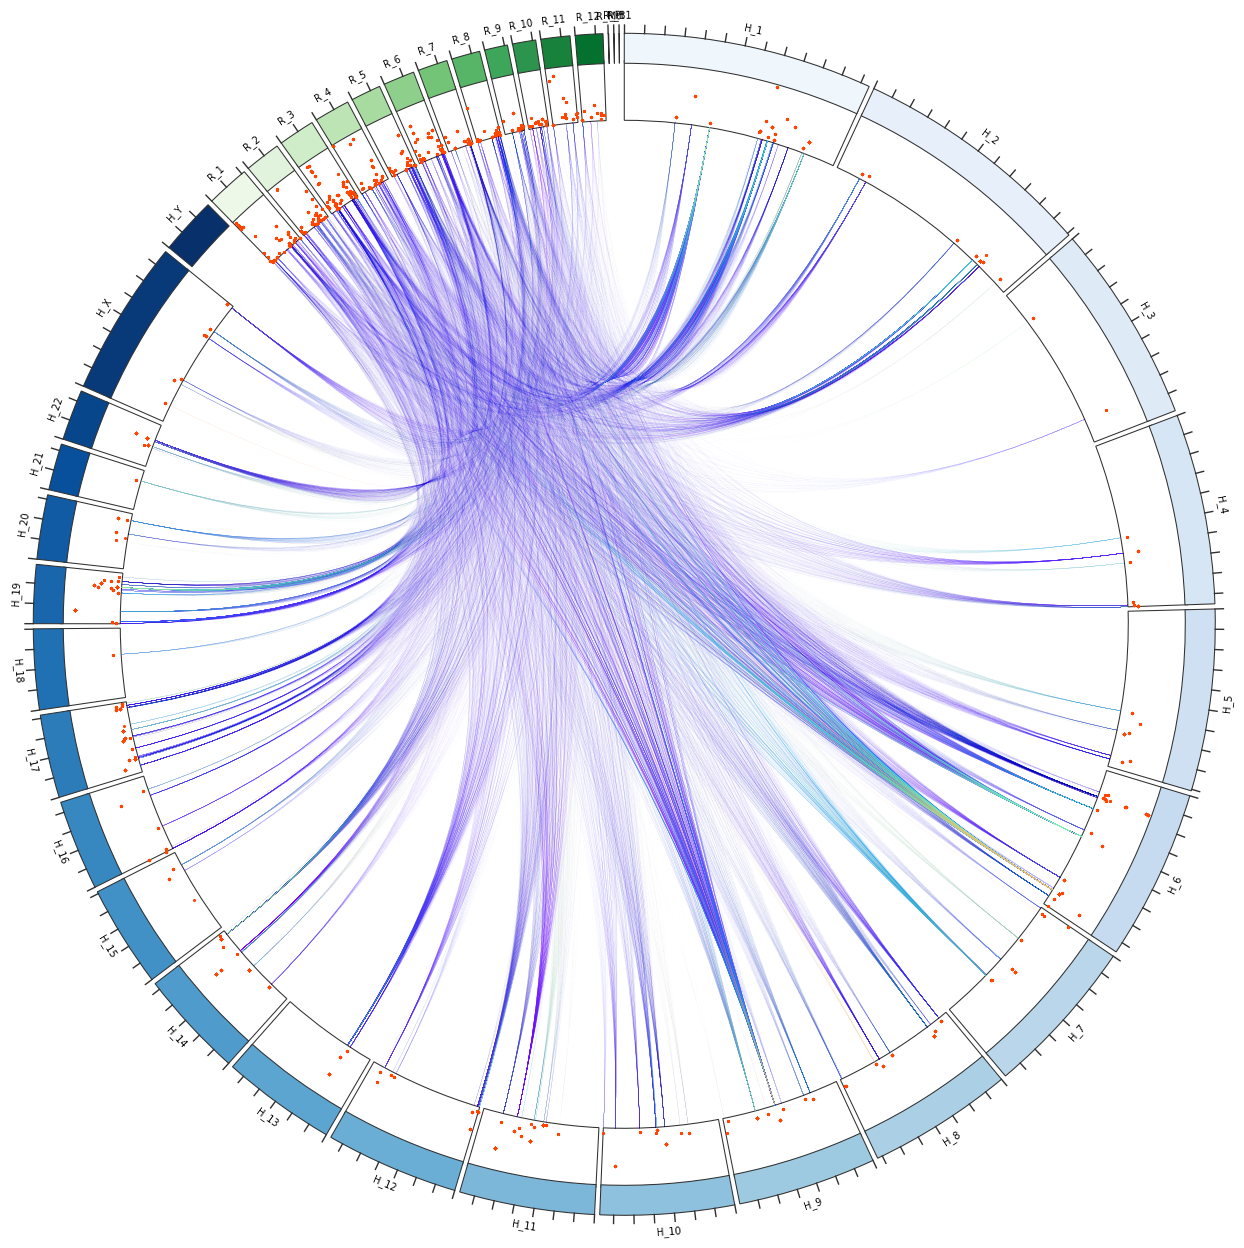

In [18]:
circle.figure

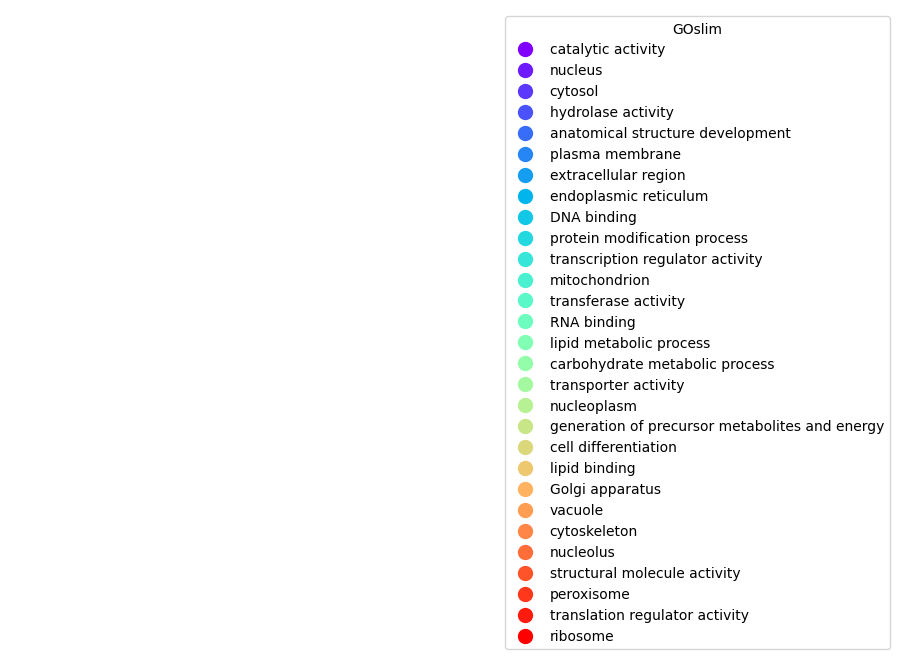

In [19]:
# add legend as a independent figure
fig, ax = plt.subplots(figsize=(6, 6))
for ontology, color in ontology_color_dict.items():
    ax.plot([], [], 
            label=ontology, 
            color=color, 
            marker='o', 
            markersize=10, 
            linestyle='None')

ax.legend(title="GOslim", 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')
ax.axis('off')
plt.show()
